# TP 1 : Méthodes de Signal Avancées Annulation d’Écho Acoustique

In [21]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt

## I. Implémentation de l'algorithme LMS

### I.1 Générations de signaux tests

In [25]:
# Ajout du dossier src au path (si pas déjà fait)
ROOT = Path.cwd().parents[0]  # remonte d'un cran depuis notebook/
sys.path.append(str(ROOT / "src"))

from importlib import reload
import signals_utils  # ou signals, selon ton nom de fichier

reload(signals_utils)  # recharge le fichier à jour
from signals_utils import generate_test_signals


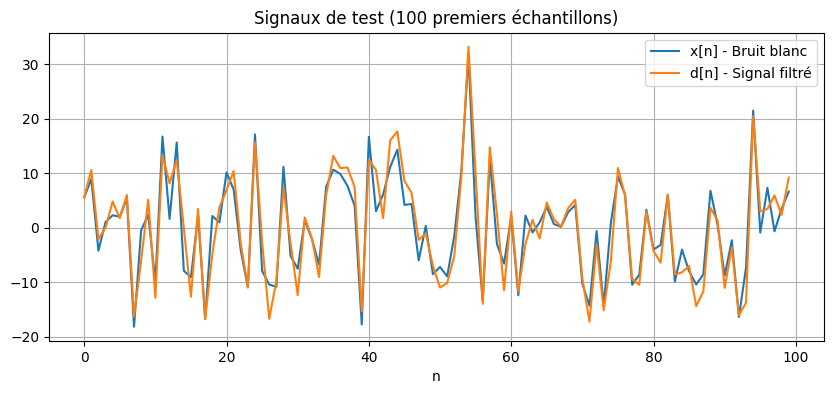

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]


In [27]:
# Génération des signaux
x, d, h = generate_test_signals(N=500, variance = 100)

# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(x[:100], label="x[n] - Bruit blanc")
plt.plot(d[:100], label="d[n] - Signal filtré")
plt.title("Signaux de test (100 premiers échantillons)")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h)